In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

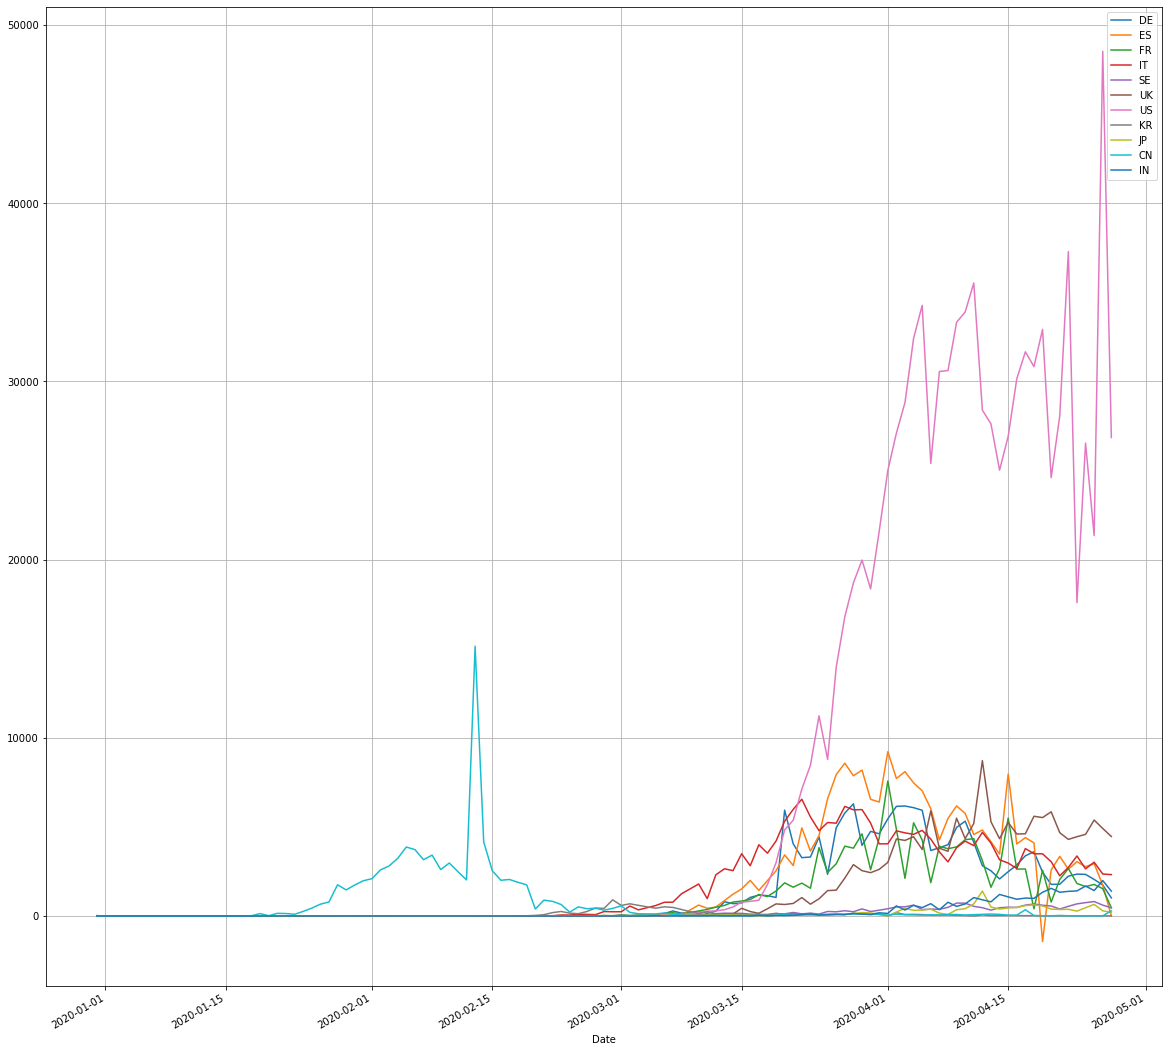

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

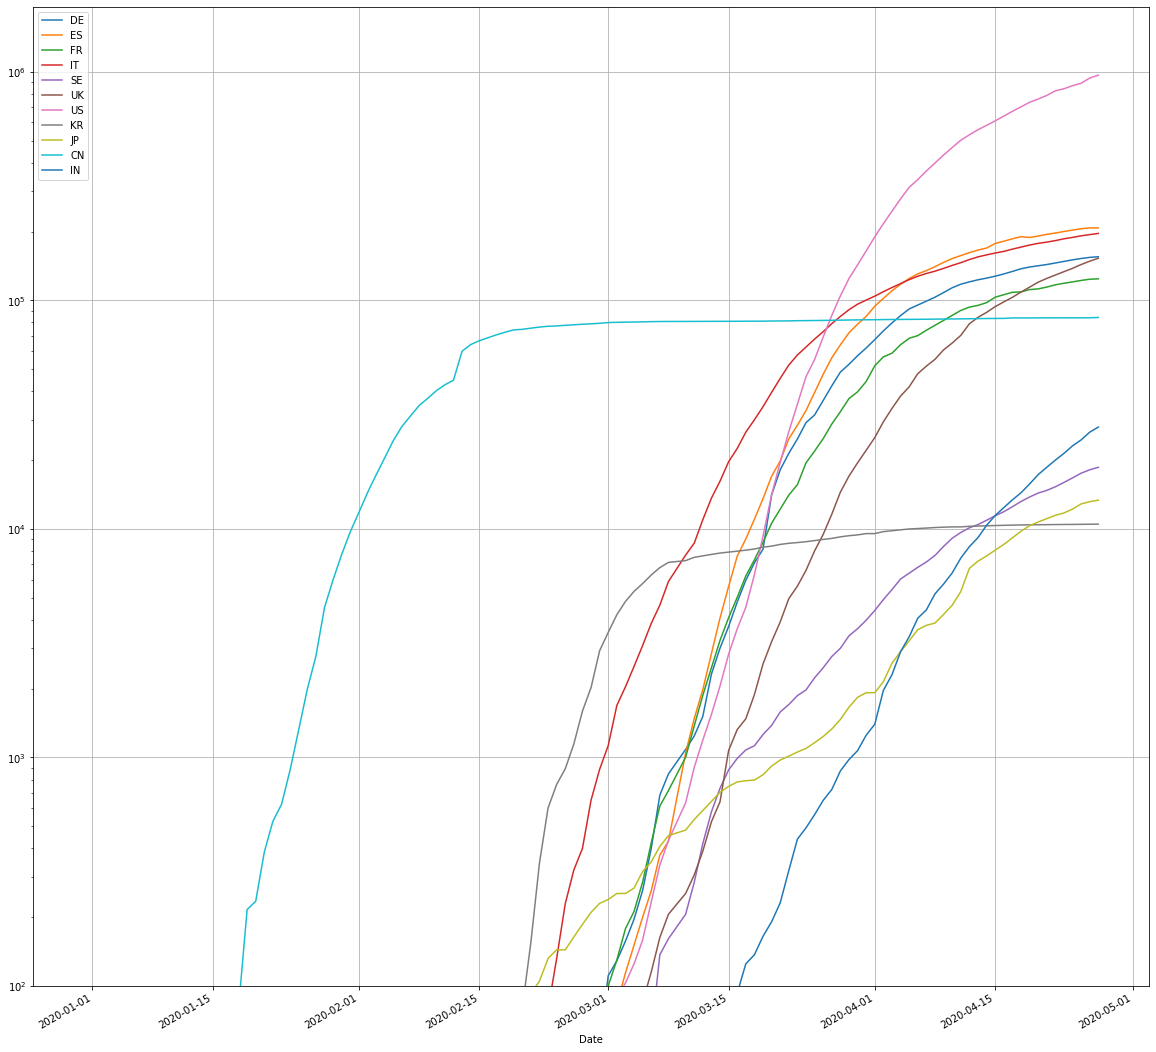

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

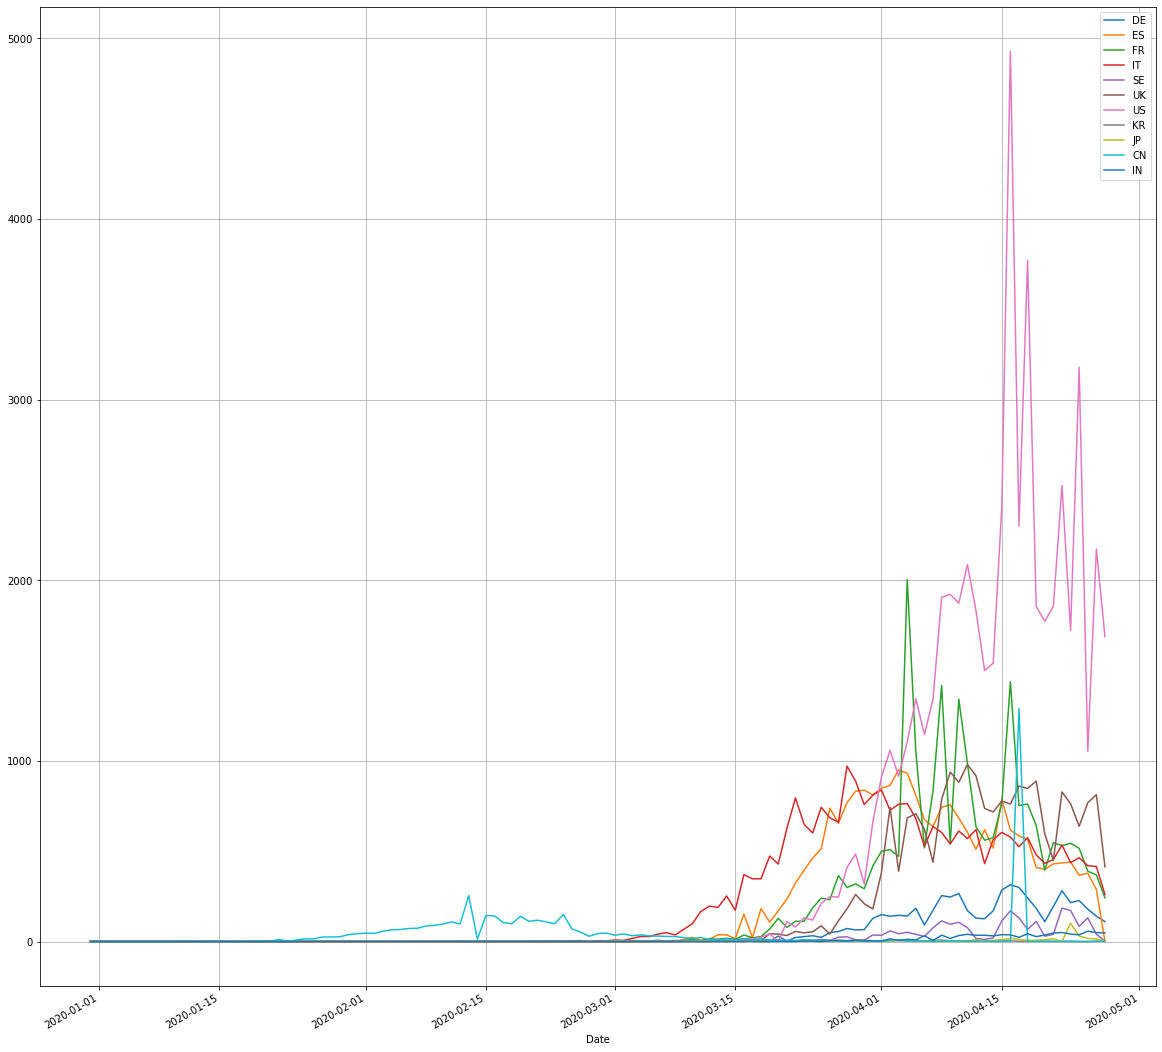

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

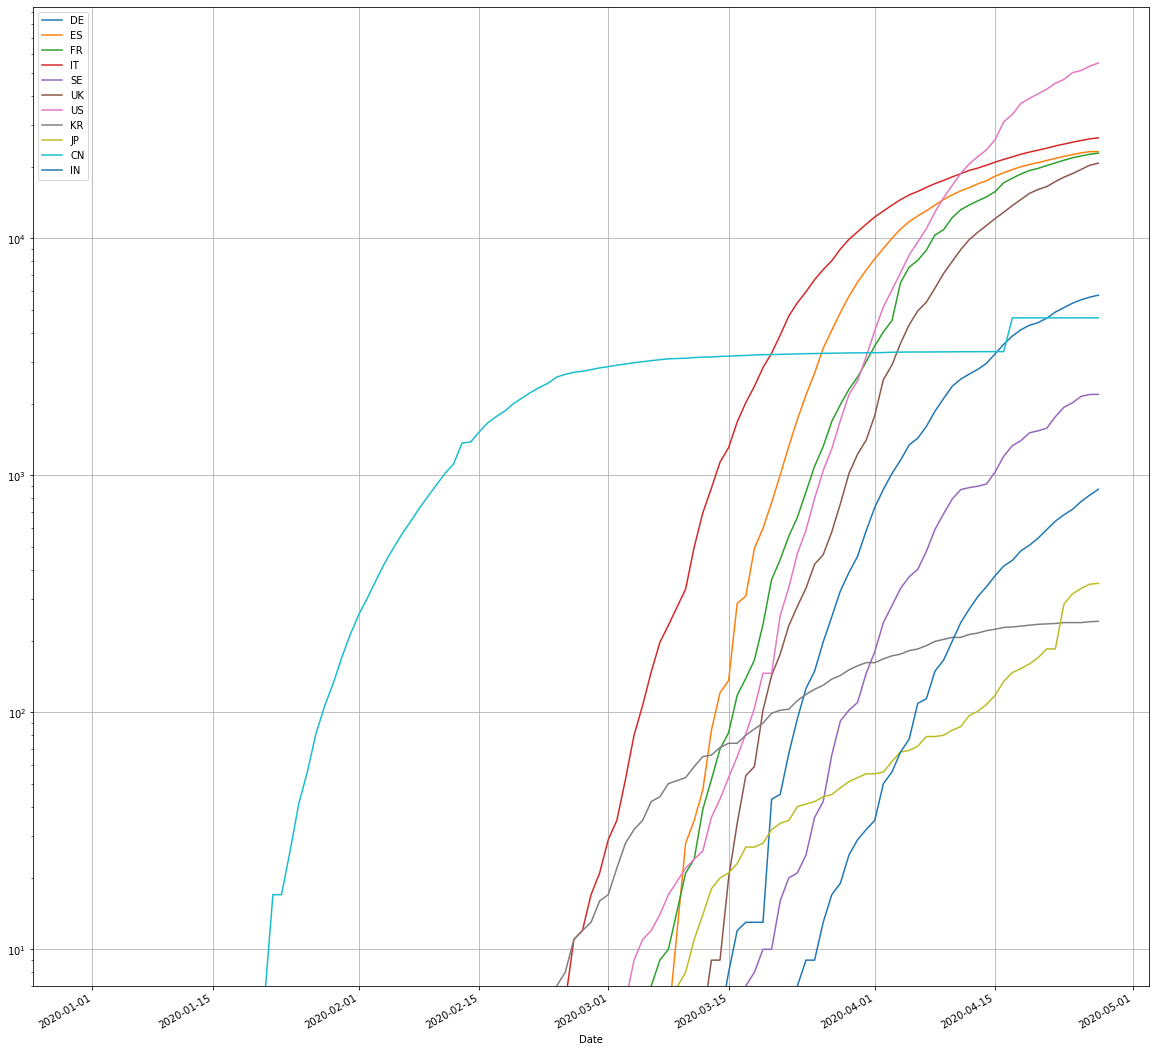

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
14,2020-04-13,2537,4167,1613,4092,332,5288,27620,25,507,112,796
13,2020-04-14,2082,3477,2673,3153,465,4342,25023,27,390,94,1211
12,2020-04-15,2486,7968,5497,2972,497,5252,26922,27,455,49,1075
11,2020-04-16,2866,4040,2633,2667,482,4603,30148,22,482,50,942
10,2020-04-17,3380,4400,2641,3786,613,4617,31667,22,585,352,1007
9,2020-04-18,3609,4104,405,3493,676,5599,30833,18,628,31,991
8,2020-04-19,2458,-1430,2569,3491,606,5525,32922,8,566,18,1334
7,2020-04-20,1775,2585,785,3047,563,5850,24601,13,390,14,1553
6,2020-04-21,1785,3352,2051,2256,392,4676,28065,9,367,32,1335
5,2020-04-22,2237,2627,2667,2729,545,4301,37289,11,378,15,1384


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-04-13,122961,165860,94993,154871,10441,84212,557450,10289,7222,83164,9152
2020-04-14,125043,169337,97666,158024,10906,88554,582473,10316,7612,83258,10363
2020-04-15,127529,177305,103163,160996,11403,93806,609395,10343,8067,83307,11438
2020-04-16,130395,181345,105796,163663,11885,98409,639543,10365,8549,83357,12380
2020-04-17,133775,185745,108437,167449,12498,103026,671210,10387,9134,83709,13387
2020-04-18,137384,189849,108842,170942,13174,108625,702043,10405,9762,83740,14378
2020-04-19,139842,188419,111411,174433,13780,114150,734965,10413,10328,83758,15712
2020-04-20,141617,191004,112196,177480,14343,120000,759566,10426,10718,83772,17265
2020-04-21,143402,194356,114247,179736,14735,124676,787631,10435,11085,83804,18600


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
14,2020-04-13,126,619,561,431,12,737,1500,3,4,2,35
13,2020-04-14,170,517,574,564,20,717,1541,5,7,0,31
12,2020-04-15,285,787,762,604,114,778,2408,3,10,1,38
11,2020-04-16,315,617,1438,578,170,761,4928,4,17,0,37
10,2020-04-17,299,585,753,525,130,861,2299,1,12,1290,23
9,2020-04-18,242,565,761,575,67,847,3770,2,6,0,43
8,2020-04-19,184,410,642,480,111,888,1856,2,7,0,27
7,2020-04-20,110,399,395,433,29,596,1772,2,10,0,36
6,2020-04-21,194,430,547,454,40,449,1857,1,15,0,47
5,2020-04-22,281,435,531,534,185,828,2524,1,0,0,50


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-04-13,2799,16972,14384,19768,899,10611,22104,216,101,3322,308
2020-04-14,2969,17489,14958,20332,919,11328,23645,221,108,3322,339
2020-04-15,3254,18276,15720,20936,1033,12106,26053,224,118,3323,377
2020-04-16,3569,18893,17158,21514,1203,12867,30981,228,135,3323,414
2020-04-17,3868,19478,17911,22039,1333,13728,33280,229,147,4613,437
2020-04-18,4110,20043,18672,22614,1400,14575,37050,231,153,4613,480
2020-04-19,4294,20453,19314,23094,1511,15463,38906,233,160,4613,507
2020-04-20,4404,20852,19709,23527,1540,16059,40678,235,170,4613,543
2020-04-21,4598,21282,20256,23981,1580,16508,42535,236,185,4613,590
